# <font color='red'>Classification on MNIST (part 2A: a simple NN)</font>

Import MNIST (NOTE: _not_ as we did it before..)

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Check what we imported.

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
test_images.shape

(10000, 28, 28)

In [4]:
train_images.dtype

dtype('uint8')

In [5]:
test_images.dtype

dtype('uint8')

In [6]:
len(train_labels)

60000

In [7]:
len(test_labels)

10000

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

The workflow will be as follows:
1.   we’ll feed the training data, `train_images` and `train_labels`, to the NN. The network will then learn to associate images and labels.
2.   we’ll ask the NN to produce predictions for `test_images`, and we’ll verify whether these predictions match the labels from `test_labels`.

In [10]:
# the network architecture
from tensorflow.keras import models
from tensorflow.keras import layers
my_network = models.Sequential([
  layers.Dense(2500, activation='relu'),
  layers.Dense(2500, activation='relu'),
  layers.Dense(2500, activation='relu'),
  layers.Dense(2500, activation='relu'),
  layers.Dense(2500, activation='relu'),
  layers.Dense(2500, activation='relu'),
  layers.Dense(2500, activation='relu'),
  layers.Dense(2500, activation='relu'),
  layers.Dense(2500, activation='relu'),
  layers.Dense(2500, activation='relu'),
  layers.Dense(2500, activation='relu'),
  layers.Dense(2500, activation='relu'),
  layers.Dense(2500, activation='relu'),
  layers.Dense(10, activation='softmax')
])

A **layer** is a data-processing module that you can think of as a filter for data. Layers extract *representations* out of the data fed into them.


In this specific case, our NN consists of:

*   a sequence of two `Dense` layers, which are `densely connected` (also called *fully connected*) neural layers
*   the second (and last) layer is a bit special: it is a 10-way `softmax` layer, which will return an array of 10 numbers, our *probability scores* (summing to 1).

To make the network ready for training, we need to pick 3 more things, in the compilation step:

*   A **loss function** (`loss` below)
*   An **optimizer** (`optimizer` below)
*   Some **metrics** (`metrics` below)


In [11]:
# the compilation step
my_network.compile(optimizer='rmsprop',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval.



In [12]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
#
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [13]:
train_images.shape

(60000, 784)

In [14]:
train_images.dtype

dtype('float32')

In [15]:
test_images.shape

(10000, 784)

In [16]:
test_images.dtype

dtype('float32')

We’re now ready to train the network, via the `fit` method.

In [17]:
%%time
# Fit the NN
my_network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
 21/469 [>.............................] - ETA: 18:55 - loss: 2.2996 - accuracy: 0.1164

KeyboardInterrupt: 

Two quantities are displayed during training:

*   the loss of the network over the training data
*   the accuracy of the network over the training data.

We quickly reach a high accuracy e.g. 0.98 or 0.99 (98% or 99%) on the training data.

Now let’s check that the model performs well on the test set, too:

In [18]:
test_loss, test_acc = my_network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 54s 171ms/step - loss: 2.2920 - accuracy: 0.1300
test_acc: 0.12999999523162842


The test set accuracy should turn out to be a bit lower than the training set accuracy. This gap between training accuracy and test accuracy is an example of overfitting.

Being careful to do the training only once and properly, you can comment the fit instruction above, in oprder to esploit the onebelow here, and rerun the notebook from scratch to benefit of pandas superpowers and get a nice viz of the training process.

In [19]:
import pandas as pd

Epoch 1/10
469/469 [==============================] - 1025s 2s/step - loss: 1.9163 - accuracy: 0.2706
Epoch 2/10
469/469 [==============================] - 1019s 2s/step - loss: 0.7760 - accuracy: 0.7484
Epoch 3/10
469/469 [==============================] - 1009s 2s/step - loss: 0.3626 - accuracy: 0.9123
Epoch 4/10
469/469 [==============================] - 1004s 2s/step - loss: 0.2052 - accuracy: 0.9541
Epoch 5/10
469/469 [==============================] - 1011s 2s/step - loss: 0.1479 - accuracy: 0.9668
Epoch 6/10
469/469 [==============================] - 1011s 2s/step - loss: 0.1169 - accuracy: 0.9743
Epoch 7/10
469/469 [==============================] - 1032s 2s/step - loss: 0.0974 - accuracy: 0.9782
Epoch 8/10
469/469 [==============================] - 1002s 2s/step - loss: 0.0795 - accuracy: 0.9821
Epoch 9/10
469/469 [==============================] - 998s 2s/step - loss: 0.0692 - accuracy: 0.9841
Epoch 10/10
469/469 [==============================] - 989s 2s/step - loss: 0.0573 

<Axes: >

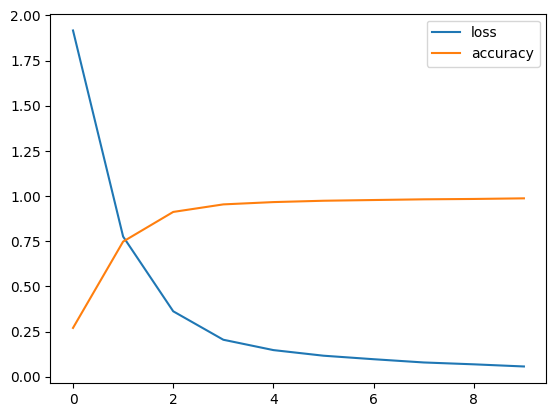

In [ ]:
%%time
history_callback = my_network.fit(train_images, train_labels, epochs=10, batch_size=128)
pd.DataFrame(history_callback.history).plot()

In [ ]:
test_loss, test_acc = my_network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

 13/313 [>.............................] - ETA: 44s - loss: 0.9389 - accuracy: 0.6082